In [ ]:
#Data folders have frame#.jpg, where # counts up and bar.png which is a screenshot from the first frame

#TODO need to make it faster, try downsampling apply gaussian blur, and then downsample both to correct size, then scale back up and search local area

In [29]:
from skimage import filters
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import scipy
from scipy import ndimage

In [21]:
# Reads in frames and bar template, TODO determine number of frames
image_folder = 'deadlift1'
bar_image = 'bar.png'
num_frames = 72
frames = np.array([io.imread(f'./{image_folder}/frame{i}.jpg') for i in range(0,num_frames)])
bar_template = np.array(io.imread(f'./{image_folder}/{bar_image}'))

In [22]:
#Removes opacity channel from template so both images are rgb
bar_template = bar_template[:,:,0:3]

In [35]:
"""
    Returns the x,y position in the search image with the highest NCC score, this method is lifted directly from HW9
    @imTemp is the template smaller in size than the search image
    @imSearch is the search image to find the closest match to the template in
"""
def findTemplate(imTemp,imSearch):
    tempHeight = imTemp.shape[0]
    tempWidth = imTemp.shape[1]

    tBar = imTemp.mean(axis=(0,1))
    tSigma = imTemp.std(axis=(0,1))

    # NCC values and (x,y) coordinates
    NCC = (0,0,0)

    #Grab all valid regions in image
    for x in range(0,imSearch.shape[1]-tempWidth):
        for y in range(0,imSearch.shape[0]-tempHeight):
            #Iterate this region
            region = imSearch[y:y+tempHeight,x:x+tempWidth]
            sBar = region.mean(axis=(0,1))
            sSigma = region.std(axis=(0,1))

            #NCC formula, I lump all three color channels together so ends up between 0 and 3 values close to 3 being a near match
            NCCScore = (1 / ((tempHeight * tempWidth) - 1)) * np.sum(((region - sBar) * (imTemp - tBar)) / ( tSigma * sSigma))
            if NCC[0] < NCCScore:
                NCC = NCCScore, x,y
    #Returns x,y position in image of the best NCC value
    return NCC[1], NCC[2]

In [36]:
tempHeight = bar_template.shape[0]
tempWidth = bar_template.shape[1]
x,y = findTemplate(bar_template,frames[30])


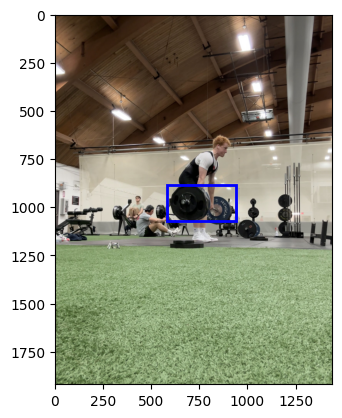

In [37]:
fig,ax = plt.subplots()
rect = patches.Rectangle((x,y), tempWidth,tempHeight, linewidth=2, edgecolor='b', facecolor='none')

ax.add_patch(rect)
ax.imshow(frames[30])

In [26]:
frames[0].shape

(1920, 1440, 3)